In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import seaborn as sns
sns.set_context("paper")
sns.set_style("ticks");

# Singular Value Decomposition

Singular value decomposition (SVD) is a factorization of a matrix into three matrices. It is used in many applications such as data compression, denoising, and solving linear systems of equations. In scientific machine learning, it is used in principal component analysis (PCA), Karhunen-Loève transform, dynamic mode decomposition, and proper orthogonal decomposition.

More details on the theory can be found on the book [Data-driven Science and Engineering](https://databookuw.com/).

Let $\mathbf{X}$ be an $n \times m$ matrix.
Think of $\mathbf{X}$ as matrix you can make when doing $n$ experiments and measuring $m$ different things.
The SVD of $\mathbf{X}$ is given by

$$
\mathbf{X} = \mathbf{U} \mathbf{\Sigma} \mathbf{V}^T
$$

where $\mathbf{U}$ is an $n \times n$ orthogonal matrix, $\mathbf{\Sigma}$ is an $n \times m$ matrix with non-negative real numbers on the diagonal and zeros elsewhere, and $\mathbf{V}$ is an $m \times m$ orthogonal matrix.

The columns of $\mathbf{U}$ are called the left singular vectors of $\mathbf{X}$, the columns of $\mathbf{V}$ are called the right singular vectors of $\mathbf{X}$, and the diagonal elements of $\mathbf{\Sigma}$ are called the singular values of $\mathbf{X}$.

## Economy-size SVD
Assume that $n \geq m$.
Then, $\mathbf{\Sigma}$ has the form:

$$
\mathbf{\Sigma} = \begin{bmatrix}
\hat{\mathbf{\Sigma}} \\
\mathbf{0}
\end{bmatrix},
$$

where $\hat{\mathbf{\Sigma}}$ is an $m \times m$ diagonal matrix with non-negative real numbers on the diagonal and zeros elsewhere, and $\mathbf{0}$ is an $(n-m) \times m$ matrix with zeros.
Now, only the first $m$ columns of $\mathbf{U}$ are needed to represent $\mathbf{X}$.
We write the **economy-size** SVD as:

$$
\mathbf{X} = \mathbf{U}_m \hat{\mathbf{\Sigma}} \mathbf{V}^T,
$$

where $\mathbf{U}_m$ is an $n \times m$ matrix with the first $m$ columns of $\mathbf{U}$.

## Truncated SVD

The truncated SVD is a low-rank approximation of $\mathbf{X}$.
It is given by:

$$
\mathbf{X} \approx \mathbf{U}_k \hat{\mathbf{\Sigma}}_k \mathbf{V}_k^T,
$$

where $\mathbf{U}_k$ is an $n \times k$ matrix with the first $k$ columns of $\mathbf{U}$, $\hat{\mathbf{\Sigma}}_k$ is a $k \times k$ diagonal matrix with the first $k$ singular values of $\mathbf{\Sigma}$, and $\mathbf{V}_k$ is an $m \times k$ matrix with the first $k$ columns of $\mathbf{V}$.

We can also write:

$$
\mathbf{X} \approx \mathbf{X}_k = \sum_{i=1}^k \sigma_i \mathbf{u}_i \mathbf{v}_i^T,
$$

where $\sigma_i$ is the $i$-th singular value, and $\mathbf{u}_i$ and $\mathbf{v}_i$ are the $i$-th columns of $\mathbf{U}$ and $\mathbf{V}$, respectively.

One can show that the matrix $\mathbf{X}_k$ is the best rank-$k$ approximation of $\mathbf{X}$ in the Frobenius norm.

## Demonstration - SVD for image compression

Let's download an image and compress it using the truncated SVD.

In [ ]:
# If you are working on Google Colab run this to download the image:
!curl -O "https://raw.githubusercontent.com/PredictiveScienceLab/advanced-scientific-machine-learning/main/book/reduced_order_modeling/neom-DMGDdksVoWI-unsplash.jpg"

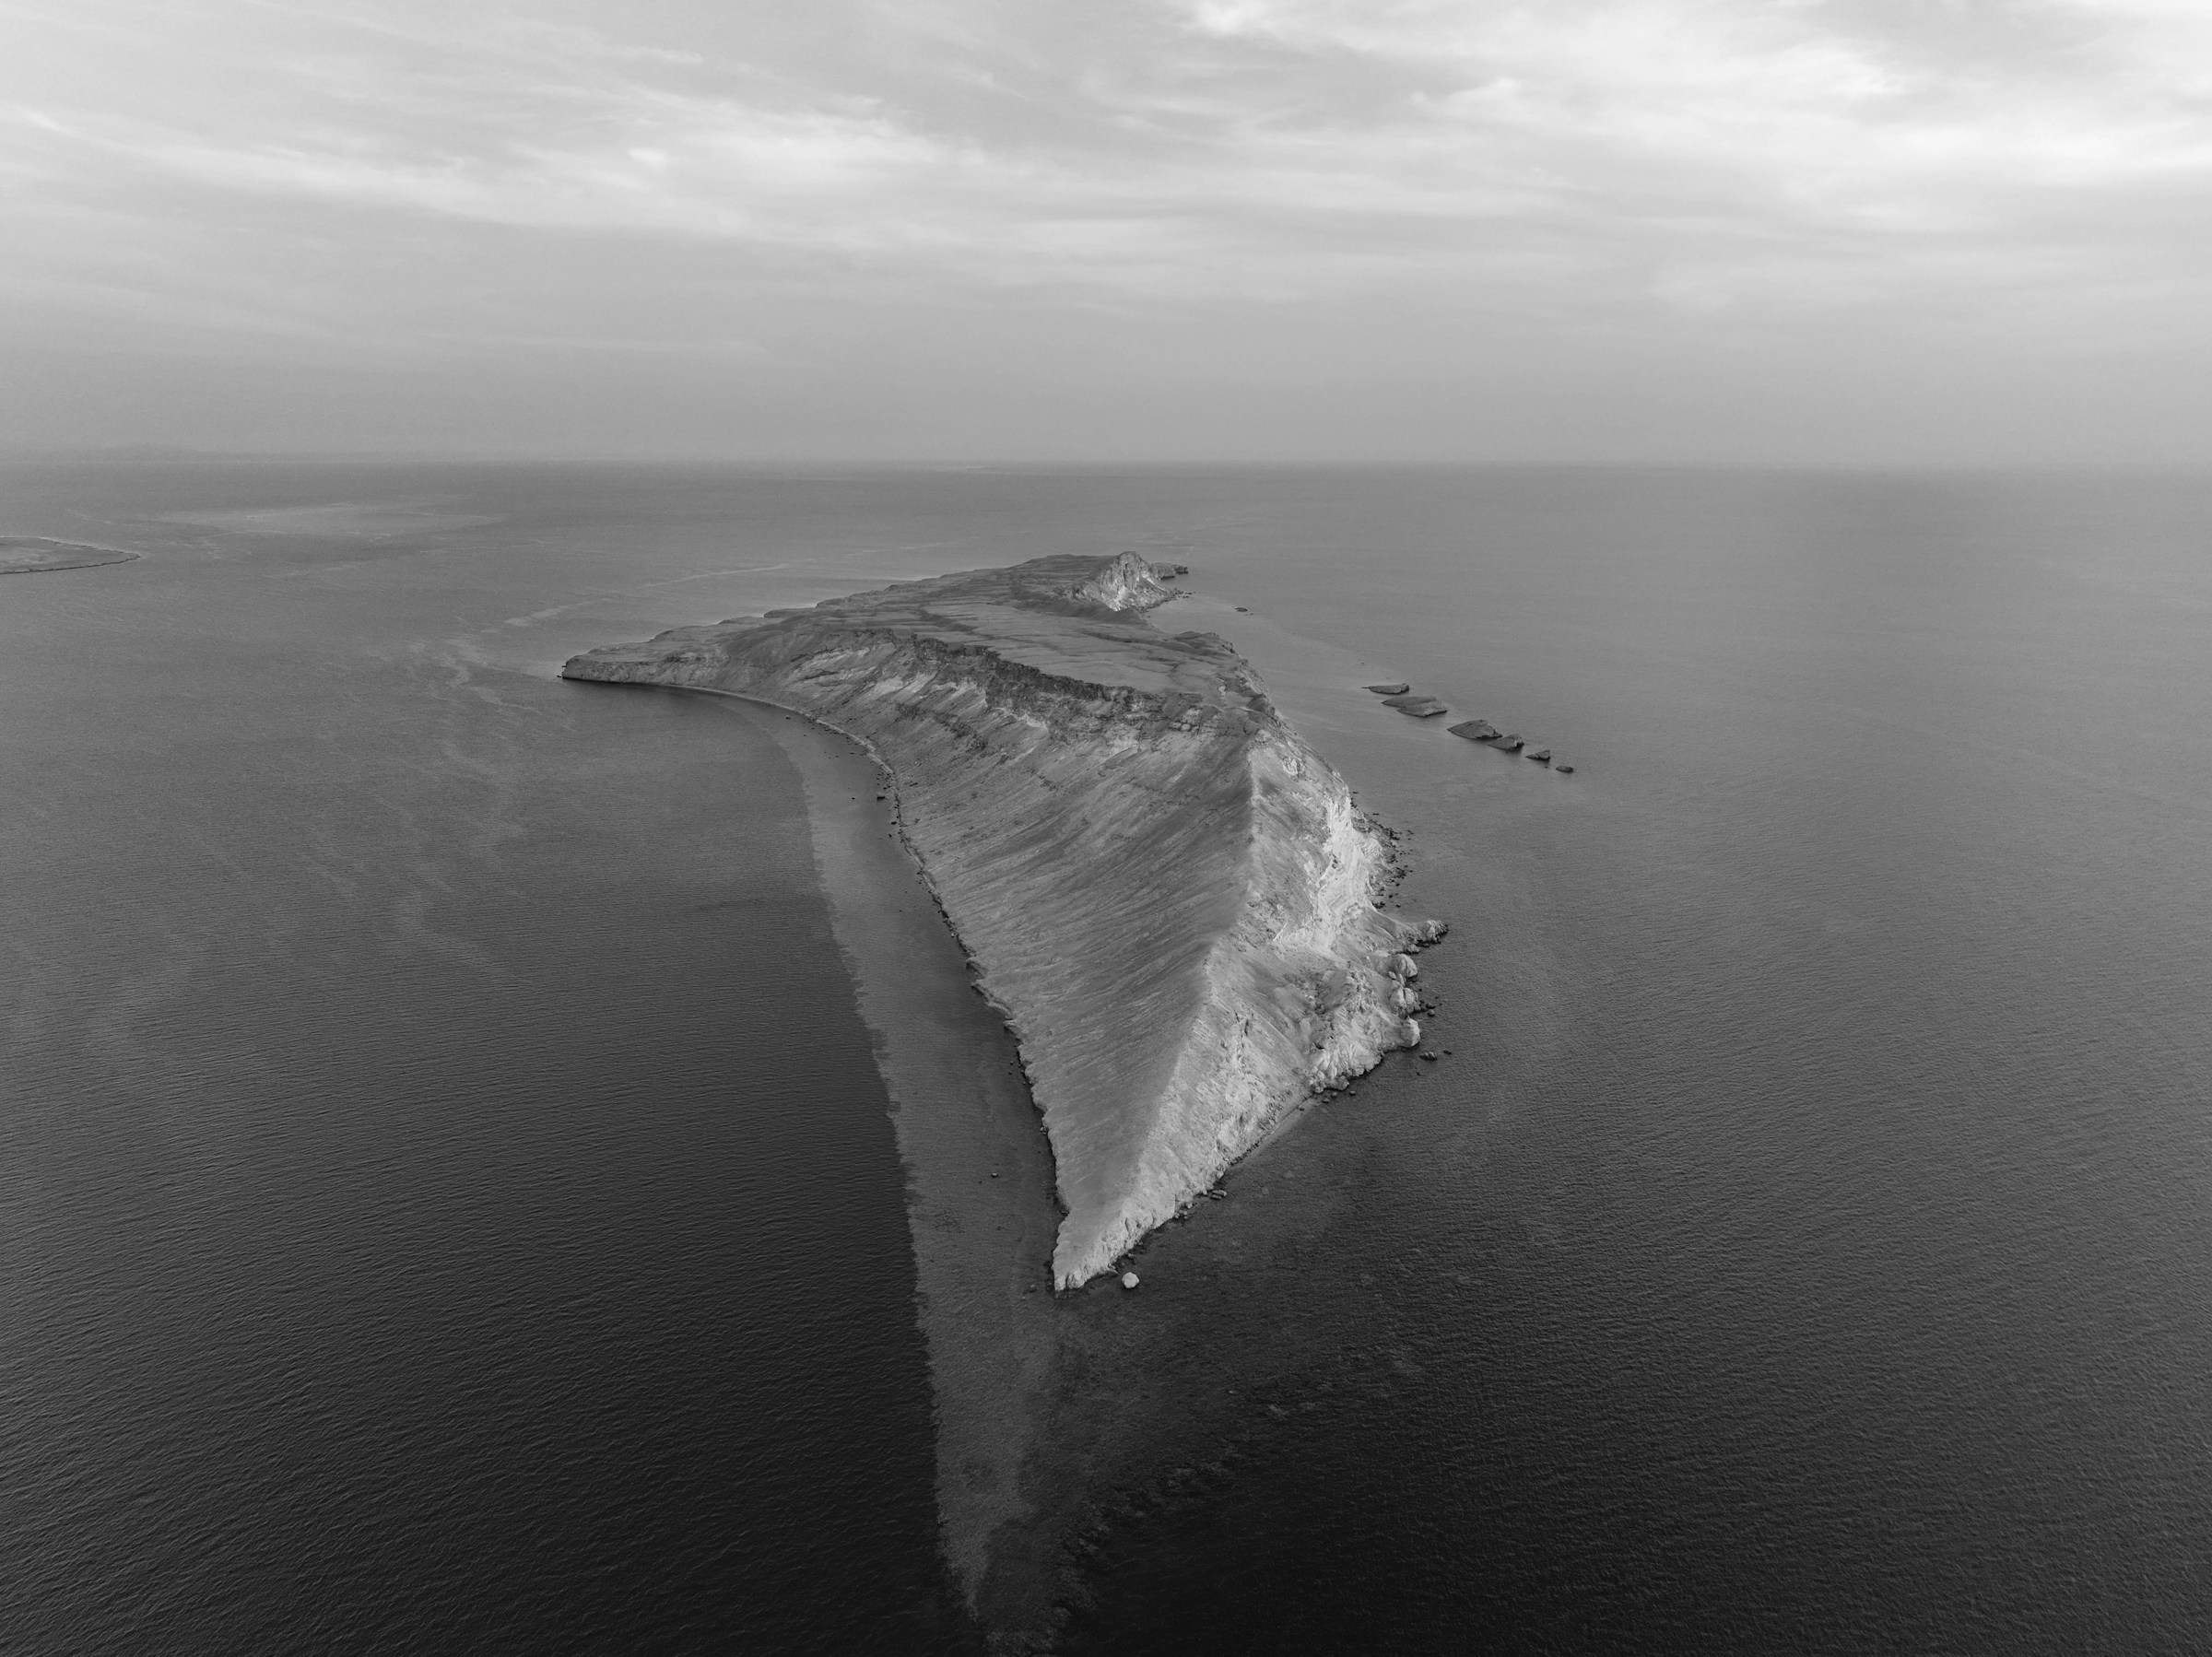

In [13]:
from PIL import Image
with open("neom-DMGDdksVoWI-unsplash.jpg", "rb") as f:
    img = Image.open(f)
    img = img.convert("L")  # convert to grayscale
img

Extract the matrix that represents the image:

In [15]:
import numpy as np
X = np.array(img)
X.shape

(1798, 2400)

Do SVD of the matrix:

In [16]:
import scipy

U, s, Vt = np.linalg.svd(X, full_matrices=False)

Let's look at the singular values as a function of the index:

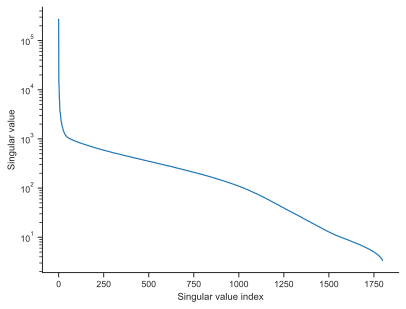

In [20]:
fig, ax = plt.subplots()
ax.plot(s)
ax.set(yscale='log', xlabel="Singular value index", ylabel="Singular value")
sns.despine();

Typically, we pick the number of singular values such that the sum of the squares of the singular values is a certain percentage of the sum of the squares of all the singular values.
For example, we pick $k$ so that:

$$
\frac{\sum_{i=1}^k \sigma_i^2}{\sum_{i=1}^m \sigma_i^2} \geq 0.9.
$$

To facilitate our choice we can do the following plot:

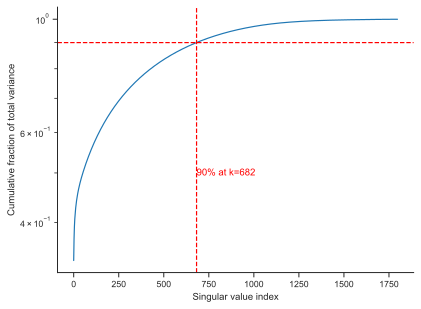

In [27]:
cum_var = np.cumsum(s)/np.sum(s)
best_k = np.argmax(cum_var > 0.9)

fig, ax = plt.subplots()
ax.plot(np.cumsum(s)/np.sum(s))
ax.axhline(0.9, color='red', linestyle='--')
ax.axvline(best_k, color='red', linestyle='--')
ax.text(best_k, 0.5, f'90% at k={best_k}', verticalalignment='center', color='red')
ax.set(yscale='log', xlabel="Singular value index", ylabel="Cumulative fraction of total variance")
sns.despine();

Let's plot the compressed images for some choices of $k$:

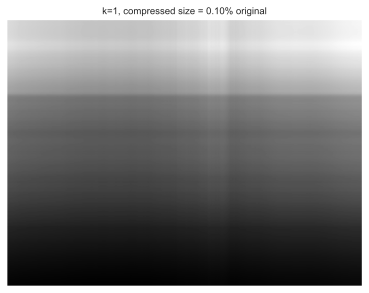

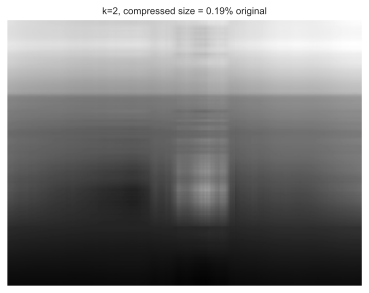

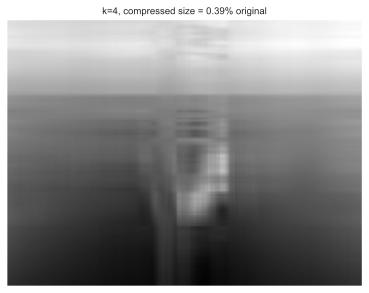

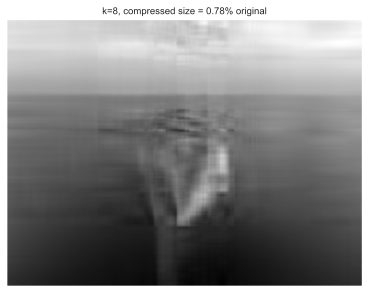

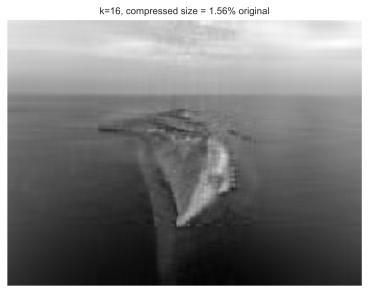

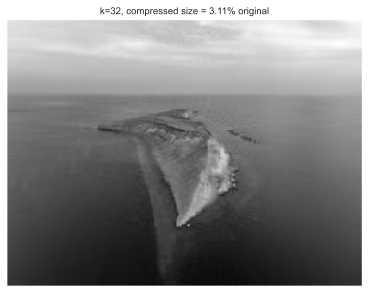

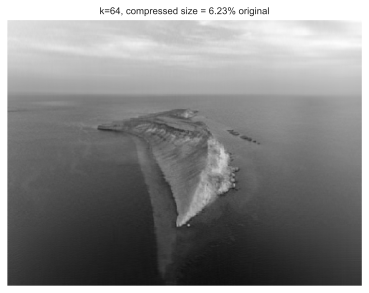

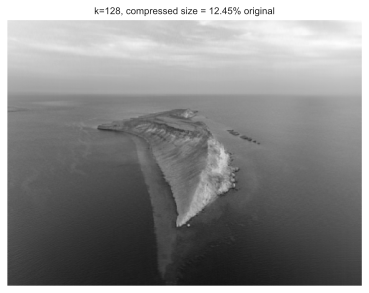

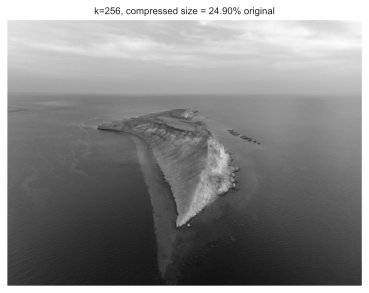

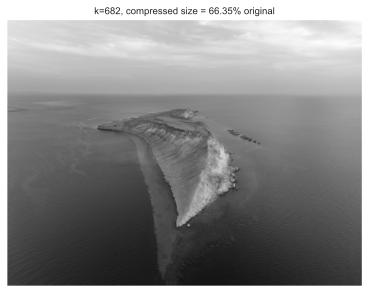

In [36]:
ks = [1, 2, 4, 8, 16, 32, 64, 128, 256, 682]

for k in ks:
    X_k = U[:, :k] @ np.diag(s[:k]) @ Vt[:k, :]
    fig, ax = plt.subplots()
    ax.imshow(X_k, cmap='gray')
    ax.axis('off')
    ax.set_title(f"k={k}, compressed size = {100*((X.shape[0] + X.shape[1]) * k)/np.prod(X.shape):.2f}% original")